## Data provenance and characteristics:
 
### When and from where it was collected:
Data was collected from the github presented in moodle:  https://github.com/Jl-wei/APIA2022-French-user-reviews-classification-dataset

### Text genre(s) and language(s) it covers
The data is purely made up of reviews on the app store, all of it written in French.

### How it has been annotated
Each entry in the data set is annotated with four labels: "Rating", "User Experience", "Feature request" and "Bug Report"
It also includes the score given by the user in each individual review.


## Pre processing


### Importing the data 


In [10]:
import nltk
import pandas as pd

# Read the data from the file
data_garmin_df = pd.read_csv('data/Garmin_Connect.csv')
data_samsung_df = pd.read_csv('data/Samsung_Health.csv')
data_huawei_df = pd.read_csv('data/Huawei_Health.csv')

data = pd.concat([data_garmin_df, data_samsung_df, data_huawei_df], ignore_index=True)

print(data.head())
print(len(data))


                                                data  score  rating  \
0  Contrairement aux idées reçues le traceur GPS ...      5       1   
1               Application très pratique et fiable.      5       1   
2                                   jadore ma montre      5       1   
3  Super application, je l'utilise synchronisé av...      5       1   
4                                            Super !      5       1   

   bug_report  feature_request  user_experience  
0           0                0                1  
1           0                0                0  
2           0                0                0  
3           0                0                1  
4           0                0                0  
6000


### Relevant plots

<AxesSubplot:>

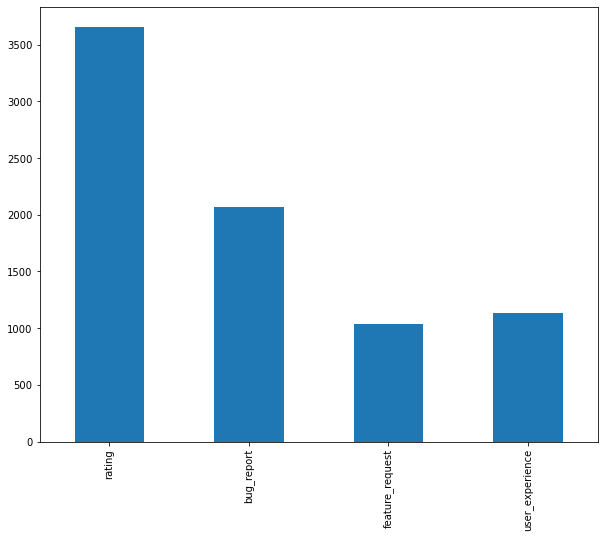

In [11]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

data_labels = data[["rating", "bug_report", "feature_request", "user_experience"]]

data_labels.sum(axis=0).plot.bar()

As we can see, the rating label is much more relevant than the other 3 labels, which causes inbalance and might mislead the results if not careful.

### Separation between train and test datasets
Separate in adequate proportions to avoid the overfitting of the modules

### Tokenization 

*Tokenization* is the process of spliting an input text into tokens (words or other relevant elements, such as punctuation, empty strings).


In [12]:
from nltk.tokenize import word_tokenize #principal tokenization class from nltk API
from nltk.stem import SnowballStemmer #Stemming method
import re #regex library
nltk.download('punkt')

corpus = []

for index, row in data.iterrows():
    review = re.sub('\*', '', row["data"]) # get data, substitute asterisks for empty string, put into review
    review = re.sub('[^a-zA-Z]', ' ', review) # from review, remove all non-alphabetic characters
    review = re.sub('[^\w\s]', '', review) # remove punctuation from review
    review = ' '.join([SnowballStemmer('french').stem(w) for w in word_tokenize(review.lower(), language='french')]) # apply stemming
    corpus.append(review)

print(corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afons\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['contrair aux id e re ue le traceur gp est tr s pr cis dumoin avec vivoact music tr s motiv pour la suit je conseil garmin', 'appliqu tr s pratiqu et fiabl', 'jador ma montr', 'sup appliqu je l utilis synchron avec ma fenix et j ador', 'sup', 'appliqu tr s pratiqu et tr s simpl d utilis une fois la montr coupl e pour la prem re fois tout se fait automat n anmoin depuis quelqu temp le don e d altitud sont total fauss e', 'suiv du sommeil cardio nombr de pas avec la distanc dan la journ e impecc', 'symp et pr cis', 'tr s satisf', 'bonjour le calendri ne se synchronis plus en plein pr parat sem marathon avec une montr euro a l a fout mal le calendri va jusqu en juin et pas plus loin j ai essay bcp de manipul en vain', 'fonction parfait bien', 'il ne manqu plus que la cr ation de parcour comm sur le sit et ce ser parf', 'tout fonction appliqu compl te', 'j ador mais de fois de probl me de connexion dommag', 'bien san plus je pr f re larg l interfac de strav avec se inform plus conden e ou